In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None) # NÃO HÁ LIMITE DE COLUNAS
pd.set_option('display.max_rows', 30)

# PROJETO HOUSE PRICES
Criar um modelo de machine learning para prever o 'Sale Price', verificar como que sale price se comporta

In [3]:
df = pd.read_csv('DataBase.csv')
print(df.shape)

df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# TRATAMENTO DOS DADOS
- Eliminando todas as colunas com elementos totalmente nulos

In [4]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

- Analisando como estão as outras colunas, no que diz respeito ao total de elementos nulos

In [5]:
dfLength = df.shape[0]
trashColumns = []

for coluna in df.columns:
    sum = len(df.loc[df[coluna].isna()])

    if sum > 0.40 * dfLength :
        percentage = sum/dfLength * 100
        trashColumns.append(coluna)

        print(f'{coluna}: {sum} elementos nulos -> {percentage:.0f}%')

Alley: 1369 elementos nulos -> 94%
MasVnrType: 872 elementos nulos -> 60%
FireplaceQu: 690 elementos nulos -> 47%
PoolQC: 1453 elementos nulos -> 100%
Fence: 1179 elementos nulos -> 81%
MiscFeature: 1406 elementos nulos -> 96%


- Removendo as colunas indesejadas e removendo as linhas em que um dos elementos nessa linha é nulo

In [6]:
df = df.drop(columns=trashColumns)
df = df.dropna(axis=0, how='any')

print(df.shape)
df.head()

(1094, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# COLUNAS DESNECESSÁRIAS
- Verificando todas as colunas em que tempos apenas um valor, ele não varia 

In [7]:
for coluna in df.columns:
    unique = df[coluna].unique().shape[0]

    if unique < 2:
        print(coluna)

Utilities


- Deletando essa coluna, ela é desnecessária

In [8]:
del df['Utilities']

# PREPARANDO O MODELO
- Antes de fazer o modelo de previsão, precisamos dividir o data frame em dados categóricos e dados numéricos, para isso, vamos armazenar em listas os nomes das colunas numéricas e categóricas

In [9]:
numericColumns = df.columns[df.dtypes != 'object']
textColumns = df.columns[df.dtypes == 'object']

print(numericColumns[:5])
print(textColumns[:5])

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'], dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig'], dtype='object')


- Dados numéricos, só vamos adicionar os que a correlação é maior do que 60%

In [10]:
corr = df[numericColumns].corr()
desiredNumeric = []

for index, row in corr.iterrows():
    for col in corr.columns:
        valor = row[col]

        if abs(valor) > 0.6 and index != col and index == 'SalePrice':
            print(f"Correlação => {index} x {col} = {row[col]}")
            desiredNumeric.append(col)

Correlação => SalePrice x OverallQual = 0.7954368169482007
Correlação => SalePrice x TotalBsmtSF = 0.6177408002371746
Correlação => SalePrice x 1stFlrSF = 0.6176923632483357
Correlação => SalePrice x GrLivArea = 0.707481424487248
Correlação => SalePrice x GarageCars = 0.652102914337312
Correlação => SalePrice x GarageArea = 0.6207724114772003


- Dados categóricos

In [11]:
from plotly.subplots import make_subplots

for coluna in df[textColumns]:
    grafico = px.histogram(df, x='SalePrice', color=coluna, histnorm='percent', width=700, height=400)
    grafico.update_traces(marker_line_width=1, marker_line_color="black")
    grafico.show()

In [12]:
desiredText = ['Street']

# CONSTRUINDO O MODELO

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

- Convertendo todos os dados categóricos para números únicos

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for coluna in desiredText:
    df[coluna] = labelencoder.fit_transform(df[coluna])

df['Street'].head()

0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int32

In [15]:
x = df[desiredNumeric + desiredText]
y = df['SalePrice']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(x_treino, y_treino)

RandomForestClassifier()

In [16]:
y_pred = model.predict(x_teste)
y_pred[:5]

array([157900, 251000, 202500, 202500, 145000], dtype=int64)

In [17]:
print("acuracy: ", accuracy_score(y_teste, y_pred))

acuracy:  0.0091324200913242


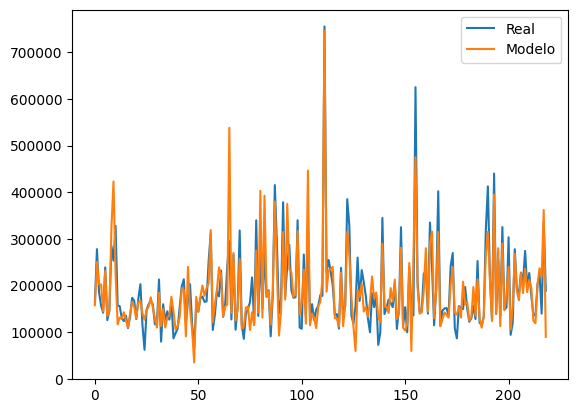

In [18]:
t = [c for c in range(len(y_teste))]

plt.plot(t, y_teste, label='Real')
plt.plot(t, y_pred, label='Modelo')
plt.legend()

In [19]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

ypred = model.predict([[7, 856, 856, 1710, 2, 548, 1]])

print(ypred[0])
print(y[0])

print((ypred[0] - y[0]))


196500
208500
-12000
